<a href="https://colab.research.google.com/github/terabitiya/Data-Literacy-Project/blob/main/Data_Preparation_Russia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import pylab as plt
import seaborn as sns
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [11]:
path = '/content/drive/MyDrive/Tuebingen/Data Literacy/Project/'
data_rus = pd.read_csv(path+'2021.csv.zip')
data_rus.shape

(96325, 32)

In [12]:
data_rus = data_rus.rename(columns={'1. Политическая партия "КОММУНИСТИЧЕСКАЯ ПАРТИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ"': "CPRF",
                            '2. Политическая партия "Российская экологическая партия "ЗЕЛЁНЫЕ"':'Green',
                            '3. Политическая партия ЛДПР – Либерально-демократическая партия России':'LDPR',
                            '4. Политическая партия "НОВЫЕ ЛЮДИ"':'New_People',
                            '5. Всероссийская политическая партия "ЕДИНАЯ РОССИЯ"':'UR',
                            '6. Партия СПРАВЕДЛИВАЯ РОССИЯ – ЗА ПРАВДУ':'Just',
                            '7. Политическая партия "Российская объединенная демократическая партия "ЯБЛОКО"':'Yabloko',
                            '8. Всероссийская политическая партия "ПАРТИЯ РОСТА"':'Growth',
                            '9. Политическая партия РОССИЙСКАЯ ПАРТИЯ СВОБОДЫ И СПРАВЕДЛИВОСТИ':'Freedom_and_Just',
                            '10. Политическая партия КОММУНИСТИЧЕСКАЯ ПАРТИЯ КОММУНИСТЫ РОССИИ':'Communist_party',
                            '11. Политическая партия "Гражданская Платформа"':'Civil_Platform',
                            '12. Политическая партия ЗЕЛЕНАЯ АЛЬТЕРНАТИВА':'Green_Alternative',
                            '13. ВСЕРОССИЙСКАЯ ПОЛИТИЧЕСКАЯ ПАРТИЯ "РОДИНА"':'Rodina',
                            '14. ПАРТИЯ ПЕНСИОНЕРОВ':'Pensioners'
                            })

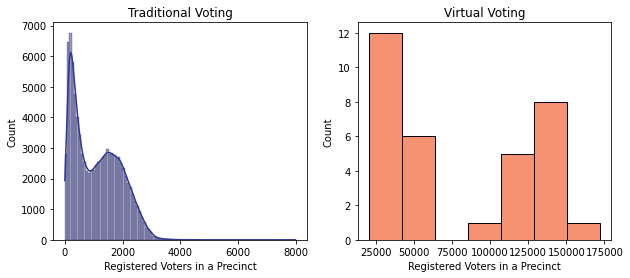

In [13]:
column_voters = 'Число избирателей, внесенных в список избирателей на момент окончания голосования'
electronic_voters = data_rus.loc[data_rus[column_voters]>10000][column_voters]
traditional_voters = data_rus.loc[data_rus[column_voters]<=10000][column_voters]

fig,axes = plt.subplots(1,2,figsize=(10,4))

sns.histplot(ax=axes[0],data=traditional_voters, bins=100,kde=True, color='#313695').set_title('Traditional Voting')
axes[0].set(xlabel='Registered Voters in a Precinct')
sns.histplot(ax=axes[1],data=electronic_voters,color='#f46d43').set_title('Virtual Voting')
axes[1].set(xlabel='Registered Voters in a Precinct')

plt.show()

In [14]:
# removing the polling stations where the number of registered voters is equal to 0, the number of given ballots is 0, the number of received ballots is 0
# registered voters
data_rus = data_rus.loc[(data_rus[column_voters]>0),:]
# given
data_rus = data_rus.loc[(data_rus['Число избирательных бюллетеней, выданных избирателям, проголосовавшим досрочно']>0) |
                (data_rus['Число избирательных бюллетеней, выданных в помещении для голосования в день голосования']>0) |
                (data_rus['Число избирательных бюллетеней, выданных вне помещения для голосования в день голосования']>0),:]
# received
data_rus = data_rus.loc[((data_rus['Число действительных избирательных бюллетеней']+data_rus['Число недействительных избирательных бюллетеней'])>0),:]

In [15]:
pd.to_pickle(data_rus,path+'data_rus.pkl')